In [1]:
import sys 
sys.path.append('..')

In [2]:
from datetime import datetime as dt

import numpy as np
import pandas as pd

from preprocessing import Preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV


from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier

In [6]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,France,Male,33.0,3,0.00,2,True,False,181449.97,0
1,627,France,Male,33.0,1,0.00,2,True,True,49503.50,0
2,678,France,Male,40.0,10,0.00,2,True,False,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,True,True,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,True,True,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,True,True,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,False,False,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,True,True,127429.56,0


In [9]:
train.Geography = train.Geography.map({'France':0,'Spain':0,'Germany':1})

In [13]:
train.Gender = pd.factorize(train.Gender)[0]

In [14]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,
0,668,0,0,33.0,3,0.00,2,True,False,181449.97,0
1,627,0,0,33.0,1,0.00,2,True,True,49503.50,0
2,678,0,0,40.0,10,0.00,2,True,False,184866.69,0
3,581,0,0,34.0,2,148882.54,1,True,True,84560.88,0
4,716,0,0,33.0,5,0.00,2,True,True,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,1,33.0,2,0.00,1,True,True,131834.75,0
165030,792,0,0,35.0,3,0.00,1,False,False,131834.45,0
165031,565,0,0,31.0,5,0.00,1,True,True,127429.56,0


In [15]:
col_norm = ['CreditScore', 'Age', 'Balance', 'Tenure', 'NumOfProducts','EstimatedSalary']

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [20]:
scaler = RobustScaler()

In [23]:
train.loc[:, col_norm] = scaler.fit_transform(train[col_norm])

In [3]:
col_drop = ['CustomerId','Surname']
types = {
    'HasCrCard':bool,
    'IsActiveMember':bool
}
train = pd.read_csv('../data/train.csv', index_col='id', dtype=types).drop(columns=col_drop)
train.drop_duplicates(inplace=True)

In [27]:
train.shape

(164911, 11)

In [28]:
train.drop_duplicates(inplace=True)

In [63]:
X = train.drop(columns='Exited')
y = train.Exited

In [9]:
prepro = Preprocessing()
X_scld = prepro.fit_transform(X).astype(float)

In [30]:
skf = StratifiedKFold(n_splits=4)

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [32]:
params = {
    "booster": ['gbtree', 'gblinear', 'dart'],
    "eta": [0.01, 0.3, 0.5, 0.8],
    "gamma": [0, 1, 2, 5, 10],
    "max_depth": [3, 6, 12, 24],
    "min_child_weight": [1, 2, 3],
    "sample_method": ['uniform','gradient_based'],
    "max_leaves": [0, 1, 2],
    "n_estimators": [50, 100, 200]
}

grid = RandomizedSearchCV(
    XGBClassifier(),
    params,
    cv=skf,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=10,
    n_iter=50,
)

In [34]:
grid.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


c:\Users\Bamdantag\miniconda3\envs\brandnew\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:27:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_method" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impor...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'eta': [0.01, 0.3, 0.5, 0.8],
                                        'gamma': [0, 1, 2, 5, 10],
                                        'max_depth': [3, 6, 12, 24],
                                        'max_leaves': [0, 1, 2],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [50, 100, 200],
                                        'sample_method': ['uniform',
                                                          'gradient_based']},
                   scoring='roc_auc', verbose=10)

In [36]:
grid.best_params_

{'sample_method': 'gradient_based',
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_leaves': 0,
 'max_depth': 6,
 'gamma': 5,
 'eta': 0.3,
 'booster': 'gbtree'}

In [35]:
grid.best_score_

0.8887104418115203

In [50]:
params_specific = {
    'n_estimators': np.arange(75,151,3),
    'eta': np.arange(0.45,0.56, 0.01),
    #"min_child_weight": np.arange(1.5,2.6, 0.1),
    #'max_depth': [1,2,3,4,5]

}

In [51]:
grid = RandomizedSearchCV(
    XGBClassifier(
    sample_method='uniform',
    min_child_weight=2,
    max_leaves=0,
    max_depth=3,
    gamma=0,
    booster='gbtree',
    n_estimators=75,
    eta=0.47),
    params_specific,
    cv=skf,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=10,
    n_iter=100
)

In [ ]:
{'sample_method': 'gradient_based',
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_leaves': 0,
 'max_depth': 6,
 'gamma': 5,
 'eta': 0.3,
 'booster': 'gbtree'}

In [40]:
params_specific = {
    'n_estimators': np.arange(75,126,3),
    'eta': np.arange(0.2,0.4, 0.01),
    'gamma':[4,5,6],
    
}

In [41]:
grid = RandomizedSearchCV(
    XGBClassifier(
    sample_method='gradient_based',
    min_child_weight=2,
    max_leaves=0,
    max_depth=6,
    gamma=0,
    booster='gbtree',),
    params_specific,
    cv=skf,
    scoring='roc_auc',
    n_jobs = -1,
    verbose=10,
    n_iter=50
)

In [42]:
grid.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


c:\Users\Bamdantag\miniconda3\envs\brandnew\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:33:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_method" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, grow_policy=None,
                                           impo...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'eta': array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39]),
                                        'gamma': [4, 5, 6],
                                        'n_estimators': array([ 75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111,
       114, 117, 120, 123])},
                   scoring='roc_auc', verbose=10)

In [44]:
grid.best_params_

{'n_estimators': 108, 'gamma': 5, 'eta': 0.21000000000000002}

In [43]:
grid.best_score_

0.8890382210433403

In [45]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_gamma,param_eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
49,0.956808,0.042405,0.063325,0.003839,108,5,0.21,"{'n_estimators': 108, 'gamma': 5, 'eta': 0.210...",0.890822,0.888631,0.888672,0.888027,0.889038,0.001061,1
31,1.110800,0.139171,0.113117,0.006058,75,5,0.22,"{'n_estimators': 75, 'gamma': 5, 'eta': 0.2200...",0.890712,0.888512,0.888582,0.888257,0.889016,0.000987,2
32,1.191258,0.094637,0.119788,0.012878,96,5,0.22,"{'n_estimators': 96, 'gamma': 5, 'eta': 0.2200...",0.890712,0.888512,0.888582,0.888257,0.889016,0.000987,3
17,1.228352,0.095229,0.115559,0.006155,105,4,0.22,"{'n_estimators': 105, 'gamma': 4, 'eta': 0.220...",0.890790,0.888704,0.888575,0.887967,0.889009,0.001065,4
6,1.238801,0.057565,0.111502,0.004821,114,6,0.22,"{'n_estimators': 114, 'gamma': 6, 'eta': 0.220...",0.890922,0.888472,0.888374,0.888050,0.888954,0.001146,5
10,1.247818,0.107211,0.117029,0.005041,90,4,0.2,"{'n_estimators': 90, 'gamma': 4, 'eta': 0.2}",0.890789,0.888599,0.888443,0.887933,0.888941,0.001095,6
18,1.197988,0.108530,0.113931,0.007201,75,4,0.2,"{'n_estimators': 75, 'gamma': 4, 'eta': 0.2}",0.890789,0.888599,0.888443,0.887933,0.888941,0.001095,7
34,1.227682,0.183428,0.119788,0.032987,96,5,0.27,"{'n_estimators': 96, 'gamma': 5, 'eta': 0.2700...",0.890625,0.888415,0.888567,0.888129,0.888934,0.000989,8
29,1.147744,0.064680,0.104824,0.005212,105,5,0.27,"{'n_estimators': 105, 'gamma': 5, 'eta': 0.270...",0.890625,0.888415,0.888567,0.888129,0.888934,0.000989,8
40,1.343479,0.090518,0.128149,0.023931,123,6,0.26,"{'n_estimators': 123, 'gamma': 6, 'eta': 0.260...",0.890838,0.888506,0.888367,0.888018,0.888932,0.001115,10


In [52]:
grid.fit(X_scld,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\Bamdantag\miniconda3\envs\brandnew\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:23:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_method" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, grow_policy=None,
                                           impo...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'eta': array([0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56]),
                                        'n_estimators': array([ 75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111,
       114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150])},
                   scoring='roc_auc', verbose=10)

In [55]:
optimised = XGBClassifier(
    sample_method='uniform',
    min_child_weight=2,
    max_leaves=0,
    max_depth=3,
    gamma=0,
    booster='gbtree',
    n_estimators=75,
    eta=0.47)

In [56]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_eta,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
17,1.138464,0.075665,0.074260,0.002573,75,0.47,"{'n_estimators': 75, 'eta': 0.47000000000000003}",0.890579,0.888176,0.888301,0.888432,0.888872,0.000990,1
3,0.950459,0.058928,0.072044,0.004393,78,0.47,"{'n_estimators': 78, 'eta': 0.47000000000000003}",0.890537,0.888185,0.888346,0.888400,0.888867,0.000967,2
53,1.042064,0.037283,0.070795,0.003542,81,0.47,"{'n_estimators': 81, 'eta': 0.47000000000000003}",0.890577,0.888083,0.888349,0.888345,0.888839,0.001009,3
76,1.072447,0.039933,0.074388,0.005947,84,0.47,"{'n_estimators': 84, 'eta': 0.47000000000000003}",0.890590,0.888060,0.888352,0.888317,0.888830,0.001022,4
39,1.323425,0.072568,0.093577,0.004796,111,0.47,"{'n_estimators': 111, 'eta': 0.47000000000000003}",0.890486,0.888287,0.888429,0.888096,0.888824,0.000966,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.238438,0.060862,0.085474,0.003736,111,0.54,"{'n_estimators': 111, 'eta': 0.54}",0.889658,0.886815,0.887482,0.887621,0.887894,0.001063,96
94,1.595803,0.207533,0.095567,0.001715,120,0.54,"{'n_estimators': 120, 'eta': 0.54}",0.889588,0.886893,0.887415,0.887635,0.887883,0.001021,97
11,1.534147,0.089841,0.092574,0.002621,117,0.54,"{'n_estimators': 117, 'eta': 0.54}",0.889552,0.886858,0.887431,0.887680,0.887880,0.001010,98
50,1.552141,0.036358,0.109432,0.002168,150,0.56,"{'n_estimators': 150, 'eta': 0.56}",0.889785,0.887173,0.887251,0.887274,0.887871,0.001106,99


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

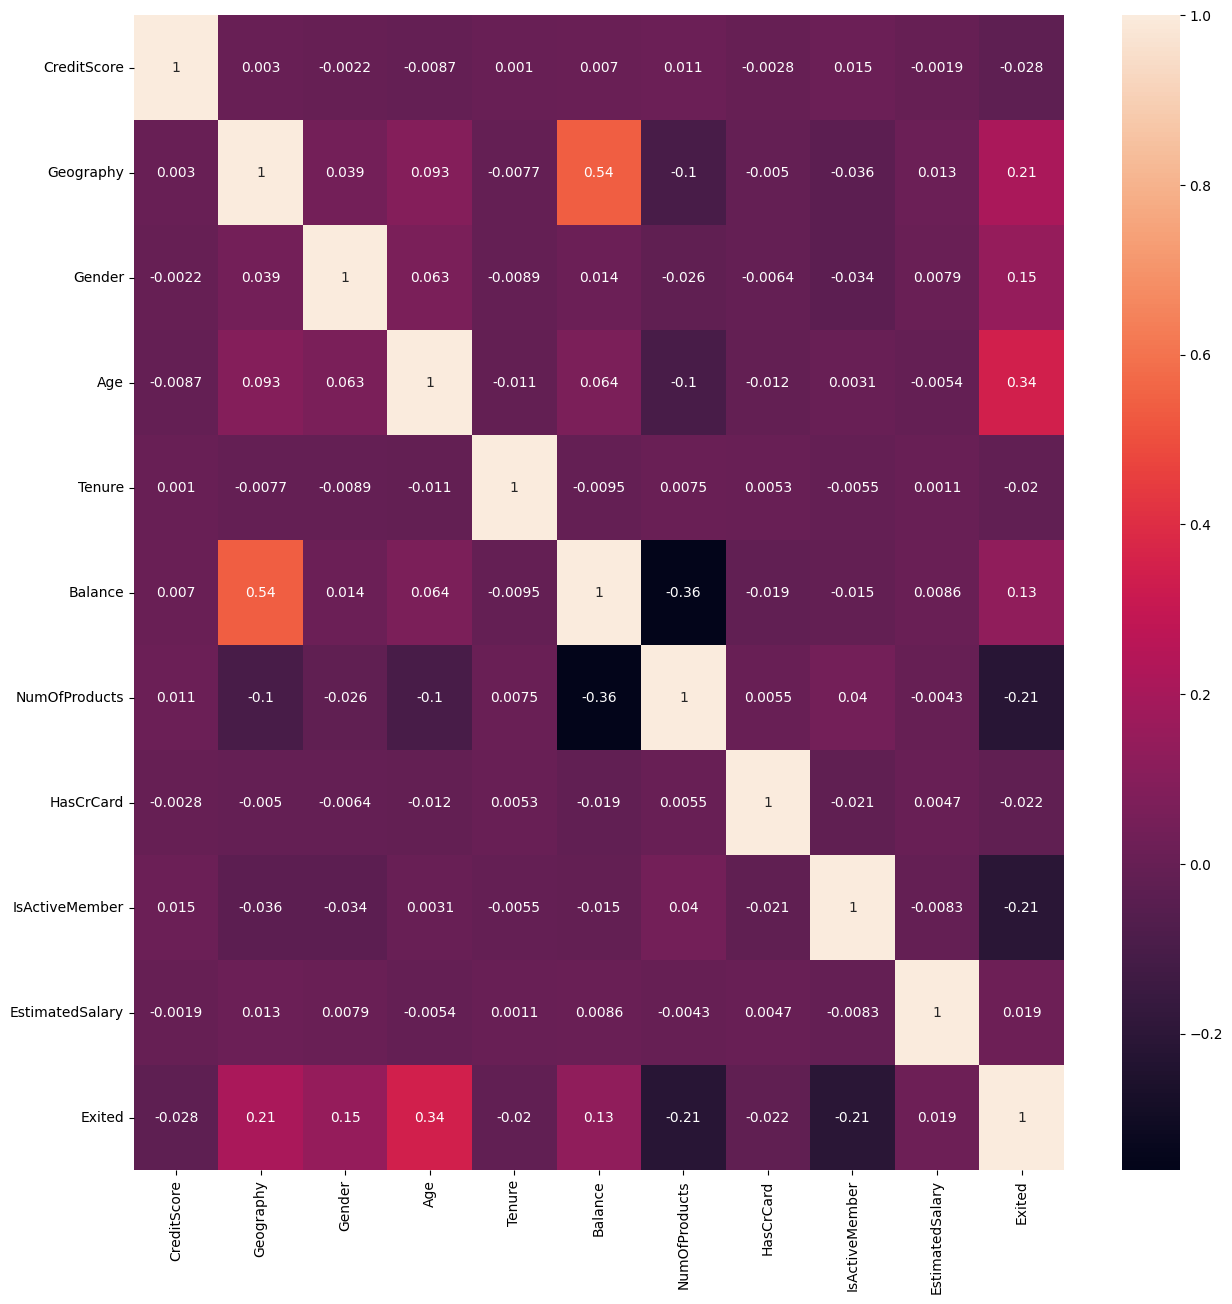

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [55]:
X = train.drop(columns=['Tenure','HasCrCard','EstimatedSalary','CreditScore','Exited'])
y = train['Exited']

In [57]:
XBGC = XGBClassifier().fit(X,y)

In [60]:
XBGC.score(X,y)

0.8704802825619925

In [66]:
from sklearn.decomposition import PCA

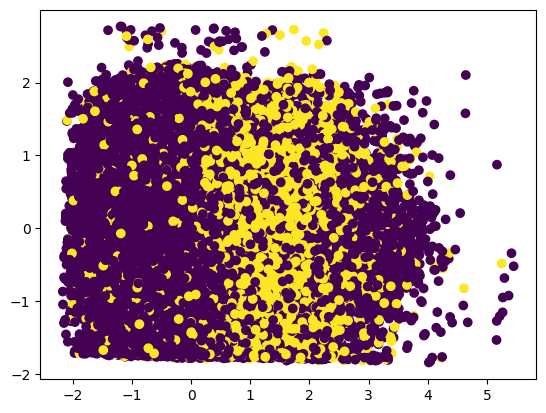

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)


In [75]:
train.groupby('Exited').agg({'Age':'median','Balance':'median'})

,Age,Balance
Exited,,
0,-0.1,0.000000
1,0.7,0.824989
